In [161]:
!nvidia-smi

Wed Jul 12 07:05:12 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.47                 Driver Version: 531.68       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 L...    On | 00000000:01:00.0 Off |                  N/A |
| N/A   62C    P8               11W /  N/A|   1018MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [162]:
import pandas as pd
import numpy as np

In [163]:
df = pd.read_csv("https://raw.githubusercontent.com/KnightChaser/ML-challenge/main/EX_challenging_problems/06_stock_price_expectation/samsung_electronics.csv")

In [164]:
df

,Unnamed: 0,Date,Volume,Open,High,Low,Close
0,0,20210601,14058401,80500,81300,80100,80600
1,1,20210602,16414644,80400,81400,80300,80800
2,2,20210603,29546007,81300,83000,81100,82800
3,3,20210604,18112259,82700,82700,81500,82200
4,4,20210607,16496197,82700,82800,81600,81900
...,...,...,...,...,...,...,...
489,489,20230523,8561643,68500,68700,68100,68400
490,490,20230524,8192896,68100,68700,68000,68500
491,491,20230525,14231160,69900,70000,68700,68800
492,492,20230526,19549511,69800,70400,69500,70300


In [165]:
print(df.shape)

(494, 7)


In [166]:
import numpy as np

def MinMaxScaler(data):

    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)             # To prevent DivideByZero exception

In [167]:
# Dataset which is only useful
dfx = df[["Volume", "Open", "High", "Low", "Close"]]

dfx = MinMaxScaler(dfx)

dfx

,Volume,Open,High,Low,Close
0,0.149371,0.909677,0.932660,0.937086,0.924092
1,0.191824,0.906452,0.936027,0.943709,0.930693
2,0.428413,0.935484,0.989899,0.970199,0.996700
3,0.222410,0.980645,0.979798,0.983444,0.976898
4,0.193293,0.980645,0.983165,0.986755,0.966997
...,...,...,...,...,...
489,0.050335,0.522581,0.508418,0.539735,0.521452
490,0.043691,0.509677,0.508418,0.536424,0.524752
491,0.152484,0.567742,0.552189,0.559603,0.534653
492,0.248305,0.564516,0.565657,0.586093,0.584158


In [168]:
dfy = dfx[["Close"]]                            # We are going to expect the close price
dfx = dfx[["Volume", "Open", "High", "Low"]]    # Only given data

In [169]:
dfx.describe()

,Volume,Open,High,Low
count,494.000000,494.000000,494.000000,494.000000
mean,0.161701,0.491550,0.485639,0.502098
std,0.098114,0.256053,0.265796,0.260946
min,0.000000,0.000000,0.000000,0.000000
25%,0.097524,0.274194,0.259259,0.281457
50%,0.140432,0.458065,0.449495,0.473510
75%,0.200042,0.709677,0.719697,0.725166
max,1.000000,1.000000,1.000000,1.000000


In [170]:
X = dfx.values.tolist()     # input
y = dfy.values.tolist()     # (expected) output

In [171]:
print(X[:3])
print(y[:3])

[[0.14937098331774254, 0.9096774193519043, 0.9326599326567924, 0.9370860927121288], [0.19182371551704053, 0.9064516129003017, 0.9360269360237844, 0.9437086092683983], [0.42841316611732666, 0.9354838709647242, 0.9898989898956568, 0.9701986754934762]]
[[0.9240924092378743], [0.9306930693038591], [0.9966996699637073]]


In [172]:
# OHLVC
# Open-High-Low-Volume-Close

# We are going to expect the next day's close price with the previous OHLVC data of $window_size days.

window_size = 5

data_X = []
data_y = []

for _seq in range(len(y) - window_size):
    _X = X[_seq : _seq + window_size]
    _y = y[_seq + window_size]
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.15679236454286077, 0.519354838708002, 0.5185185185167727, 0.5364238410578264], [0.05033518975216008, 0.5225806451596046, 0.5084175084157966, 0.5397350993359611], [0.043691427780116227, 0.5096774193531945, 0.5084175084157966, 0.5364238410578264], [0.1524836043682957, 0.5677419354820396, 0.5521885521866929, 0.5596026490047695], [0.24830501614325634, 0.564516129030437, 0.565656565654661, 0.5860927152298474]] -> [0.6501650164995044]


In [173]:
# 10-days OHLVC data

# With this data,
data_X[0]

[[0.14937098331774254,
  0.9096774193519043,
  0.9326599326567924,
  0.9370860927121288],
 [0.19182371551704053,
  0.9064516129003017,
  0.9360269360237844,
  0.9437086092683983],
 [0.42841316611732666,
  0.9354838709647242,
  0.9898989898956568,
  0.9701986754934762],
 [0.22240986260480322,
  0.9806451612871592,
  0.9797979797946808,
  0.983443708606015],
 [0.193293066373064,
  0.9806451612871592,
  0.9831649831616728,
  0.9867549668841498]]

In [174]:
# The next day's close price data

# the model is going to expect a value as near to this value as possible
print(data_y[0])

[0.9669966996667756]


In [175]:
print('Total size of the data :', len(data_X), len(data_y))

Total size of the data : 489 489


In [176]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, train_size = 0.2, random_state = 0xCAFE)

In [177]:
train_size = int(len(data_y) * 0.7)             # Train dataset will take 70% of proportion
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('Train dataset size :', train_X.shape, train_y.shape)
print('Test dataset size :', test_X.shape, test_y.shape)

Train dataset size : (342, 5, 4) (342, 1)
Test dataset size : (147, 5, 4) (147, 1)


In [178]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units = 64, activation='tanh', return_sequences = True, input_shape = (window_size, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units = 32, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(units = 1))                     # The output is only a single value.
model.summary()

# [ref] https://stackoverflow.com/questions/68844792/lstm-will-not-use-cudnn-kernels-since-it-doesnt-meet-the-criteria-it-will-use
# cuDNN acceleration only works for tanh in activation function.
# temporarily replaced the activation function relu to tanh(tangent hyperbolic).

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 5, 64)             17664     
                                                                 
 dropout_25 (Dropout)        (None, 5, 64)             0         
                                                                 
 lstm_26 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [179]:
from tensorflow._api.v2.config import optimizer
from tensorflow import keras

model.compile(loss = "mean_squared_error",         # <-- REGRESSION
              metrics = "mae",
              optimizer = "adam")

early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience = 16, restore_best_weights = True, mode = "auto")

history = model.fit(train_X, train_y,
                    epochs = 500,
                    steps_per_epoch = 50,
                    batch_size = 8,
                    validation_data = (test_X, test_y),
                    callbacks = [early_stopping_checkpoint])

Epoch 1/500
50/50 [==============================] - 3s 19ms/step - loss: 0.0552 - mae: 0.1664 - val_loss: 0.0061 - val_mae: 0.0676
Epoch 2/500
50/50 [==============================] - 0s 10ms/step - loss: 0.0069 - mae: 0.0657 - val_loss: 0.0024 - val_mae: 0.0389
Epoch 3/500
50/50 [==============================] - 0s 9ms/step - loss: 0.0055 - mae: 0.0568 - val_loss: 0.0020 - val_mae: 0.0364
Epoch 4/500
50/50 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0569 - val_loss: 0.0021 - val_mae: 0.0370
Epoch 5/500
50/50 [==============================] - 1s 10ms/step - loss: 0.0055 - mae: 0.0564 - val_loss: 0.0022 - val_mae: 0.0378
Epoch 6/500
50/50 [==============================] - 0s 8ms/step - loss: 0.0048 - mae: 0.0550 - val_loss: 0.0024 - val_mae: 0.0391
Epoch 7/500
50/50 [==============================] - 0s 8ms/step - loss: 0.0050 - mae: 0.0553 - val_loss: 0.0031 - val_mae: 0.0440
Epoch 8/500
50/50 [==============================] - 0s 9ms/step - loss: 0.0050 

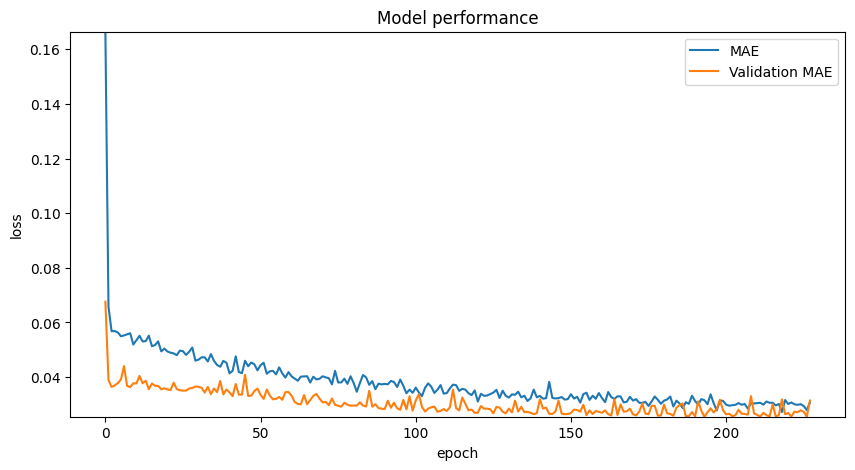

In [180]:
import matplotlib.pyplot as plt

plt.title("Model performance")

plt.plot(history.history["mae"], label = "MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")

plt.ylim([min(min(history.history["mae"]), min(history.history["val_mae"])), max(max(history.history["mae"]), max(history.history["val_mae"]))])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.show()

5/5 [==============================] - 0s 4ms/step


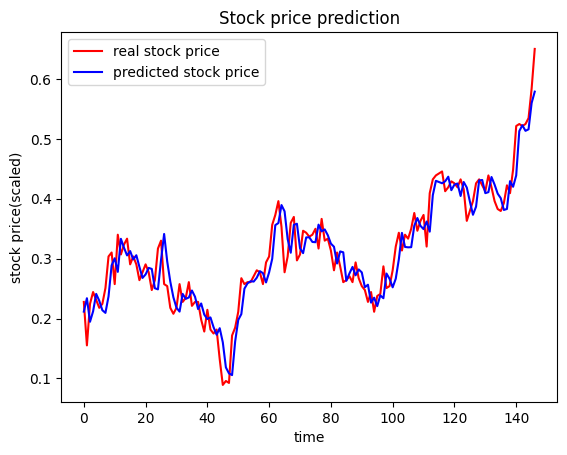

In [181]:
import matplotlib.pyplot as plt

pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('Stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price(scaled)')
plt.legend()
plt.show()

In [182]:
print(pred_y)

[[0.21153632]
 [0.23390722]
 [0.19453144]
 [0.21197158]
 [0.24108271]
 [0.2296604 ]
 [0.21383557]
 [0.20940693]
 [0.23692198]
 [0.2888024 ]
 [0.30060327]
 [0.277921  ]
 [0.33309337]
 [0.31826818]
 [0.30537587]
 [0.31257758]
 [0.2986592 ]
 [0.30564225]
 [0.28628036]
 [0.26776576]
 [0.2736414 ]
 [0.2845155 ]
 [0.28278834]
 [0.2505604 ]
 [0.24867971]
 [0.2978924 ]
 [0.3411621 ]
 [0.29537702]
 [0.26149267]
 [0.23543271]
 [0.21804072]
 [0.21152289]
 [0.24112333]
 [0.23284721]
 [0.23509096]
 [0.24676153]
 [0.23639825]
 [0.21575142]
 [0.22510378]
 [0.2064586 ]
 [0.19910112]
 [0.2018438 ]
 [0.18560156]
 [0.17293712]
 [0.18383738]
 [0.16023663]
 [0.11834708]
 [0.10834822]
 [0.10551366]
 [0.16164082]
 [0.19758454]
 [0.20737916]
 [0.24983841]
 [0.2587071 ]
 [0.26227015]
 [0.2616896 ]
 [0.26810595]
 [0.27905738]
 [0.27575862]
 [0.26024425]
 [0.27713245]
 [0.29973805]
 [0.35594785]
 [0.35939908]
 [0.3894612 ]
 [0.37899196]
 [0.33254424]
 [0.30986688]
 [0.35641083]
 [0.3582543 ]
 [0.3173009 ]
 [0.30

In [183]:
fiat_currency = "KRW"

print(f"Tomorrow's expected stock price: {(df['Close'].iloc[-1] * pred_y[-1]) / dfy['Close'].iloc[-1]} {fiat_currency}")

Tomorrow's expected stock price: [64365.0920592] KRW
